# DATASET

In [24]:
eyewear_encode = {'open': 0, "sunglasses":1}

In [29]:
# Training Data
train_files =list(map(lambda x: os.path.join("TrainingSet/",x ),os.listdir("TrainingSet")))

X_train = []
y_train = []

for i in train_files:
    if i.endswith(".jpg"):
        eyewear = eyewear_encode[i.split("/")[1].split("_")[3].strip(".jpg")]
        y_train.append(eyewear)
        m = np.asarray(Image.open(i)).flatten()
        X_train.append(m)

# Test Data
test_files =list(map(lambda x: os.path.join("TestSet/",x ), os.listdir("TestSet/")))

X_test = []
y_test = []

for i in test_files:
    if i.endswith(".jpg"):
        eyewear = eyewear_encode[i.split("/")[1].split("_")[3].strip(".jpg")]
        y_test.append(eyewear)
        m = np.asarray(Image.open(i)).flatten()
        X_test.append(m)
       
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [30]:
print(y_test)
print(X_train)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[[21  5  0 ... 44 23  2]
 [ 1  3  0 ...  3  1  0]
 [20  5  0 ...  4  2  1]
 ...
 [64 67 75 ...  0  0  4]
 [59 64 68 ...  1  0  1]
 [66 68 75 ...  1  2  2]]


In [4]:
len(X_train),len(X_test)

(315, 90)

# DECISION TREE

## part a

In [5]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=0)    #Creating decision tree with given parameters
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [6]:
from sklearn.metrics import accuracy_score        #calculating accuracy scores for both training and test
pred_train=decision_tree.predict(X_train)
pred_test=decision_tree.predict(X_test)
train_acc =accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)

In [7]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.7111111111111111
0.45555555555555555


## part b

__Did your model performs well? Is bias low or high? What about variance?__

The model didn't perform well. Bias is low and variance is high since the model performs well on training data but has high error rate on test data.

# BAGGING MODELS

## part c

In [8]:
from sklearn.ensemble import BaggingClassifier       #creating bagging classifier with decision tree classifier with given parameters
bagging_clf1 = BaggingClassifier(
    DecisionTreeClassifier(random_state=0, max_depth=2), bootstrap=False, bootstrap_features=False,
    max_features=40,random_state=0)
bagging_clf1.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=40,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

## part d

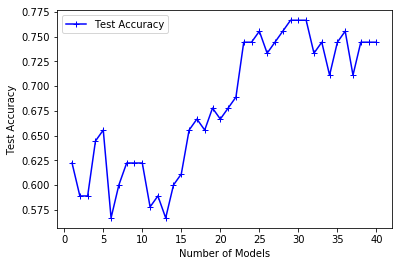

In [9]:
# PLOT

accuracy_list=[]
plt.figure()
plt.xlabel("Number of Models")
plt.ylabel("Test Accuracy")
index_list=[]
for i in range(1,41):          #finding optimum number of models for bagging by calculating accuracy for each number of models
    index_list.append(i)
    bagging_model = BaggingClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0), n_estimators=i,
    max_features=40,bootstrap= False, bootstrap_features=False, n_jobs=-1, random_state=0)
    bagging_model.fit(X_train,y_train)
    predict_test=bagging_model.predict(X_test)
    accuracy=accuracy_score(y_test, predict_test)
    accuracy_list.append(accuracy)
plt.plot(index_list,accuracy_list, '+-', color="b",
             label="Test Accuracy")
plt.legend(loc="best")
plt.show()

## part e

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Calculate train and test accuracy of the bagging model  which has the best number of models.__

Best numbers are 29, 30, 31 because they have the highest accuracy.

In [116]:
bagging_model_highest = BaggingClassifier(              #creating the model again with the best number found above
    DecisionTreeClassifier(max_depth=2, random_state=0), n_estimators=31,
    max_features=40,bootstrap= False, bootstrap_features=False, n_jobs=-1, random_state=0)
bagging_model_highest.fit(X_train, y_train)
pred_highest_train=bagging_model_highest.predict(X_train)
pred_highest_test=bagging_model_highest.predict(X_test)



In [117]:
train_acc = accuracy_score(y_train,pred_highest_train)    #calculating both trainng and test accuracies
test_acc =accuracy_score(y_test,pred_highest_test)

In [118]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.9111111111111111
0.7666666666666667


## part f

__Compare the decision tree classifier in part a and best bagging classifier in part e in terms of accuracy, bias, and variance.__

Best bagging classifier performs better. Both training and test accuracies are higher but still not satisfying since it again performs well on the training set but not that good on test set. Bias didn't change that much and the variance is lower than decision tree classifier.

## part g

In [120]:
bagging_clf2 = BaggingClassifier(             #creating again bagging classifier but with replacement this time
    DecisionTreeClassifier(max_depth=2, random_state=0),
    max_features=40,bootstrap= True, bootstrap_features=False, n_jobs=-1, random_state=0)

## part h

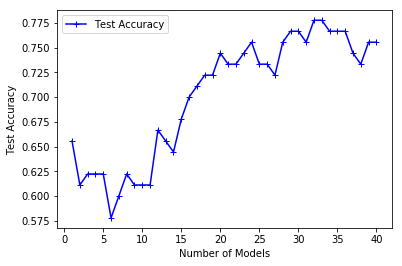

In [121]:
# PLOT
accuracy_list_2=[]
plt.figure()
plt.xlabel("Number of Models")
plt.ylabel("Test Accuracy")    
index_list_2=[]
for i in range(1,41):        #plotting test accuracy for each number of models to find the best number out of 40
    index_list_2.append(i)
    bagging_clf2 =BaggingClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0), n_estimators=i,
    max_features=40,bootstrap= True, bootstrap_features=False, n_jobs=-1, random_state=0)
    bagging_clf2.fit(X_train,y_train)
    predict_test=bagging_clf2.predict(X_test)
    accuracy=accuracy_score(y_test, predict_test)
    accuracy_list_2.append(accuracy)
plt.plot(index_list_2,accuracy_list_2, '+-', color="b",
          label="Test Accuracy")
plt.legend(loc="best")
plt.show()

## part i

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Calculate train and test accuracy of the bagging model which has the best number of models.__

Best numbers are 32,33 because they have the highest accuracy.

In [126]:
bagging_model_highest = BaggingClassifier(     #creating the new bagging classifier with the best number 
    DecisionTreeClassifier(max_depth=2, random_state=0), n_estimators=33,
    max_features=40,bootstrap= True, bootstrap_features=False, n_jobs=-1, random_state=0)
bagging_model_highest.fit(X_train, y_train)
pred_highest_train=bagging_model_highest.predict(X_train)
pred_highest_test=bagging_model_highest.predict(X_test)

In [127]:
train_acc = accuracy_score(y_train,pred_highest_train)    #calculating both training and test accuracy
test_acc =accuracy_score(y_test,pred_highest_test)

In [128]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

0.9238095238095239
0.7777777777777778


## part j

__Compare the decision tree classifier in part a and best bagging classifier in part i in terms of accuracy, bias, and variance.__

Both training and test accuracies are higher than decision tree accuracies but bias and variance are not different from the previous bagging. 

## part k

__Compare two bagging models that you found in part e and part i in terms of accuracy, bias, and variance.__

Accuracy only changed a little (91.1 to 92.3) but still the second one is better. Bias is a little lower in part i when compared to part e. Variance is not that different in both models.

## part l

__How sampling features and sampling instances affected the performance of your model? Why?__

Sampling instances and sampling feature resulted with lower variance to reduce overfitting with choosing strong features (for sampling features) and didn't change the bias. 

# BOOSTING MODELS

## part m

In [64]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(        #creating AdaBoost classifier with given parameters
    DecisionTreeClassifier(max_depth=2, random_state=0), random_state=0)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=0)

## part n

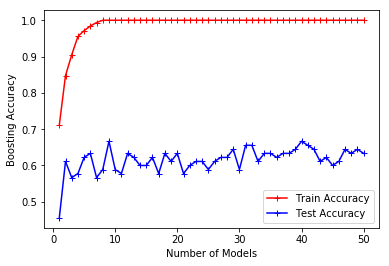

In [45]:
# PLOT
accuracy_list_test=[]
accuracy_list_train=[]
plt.figure()
plt.xlabel("Number of Models")
plt.ylabel("Boosting Accuracy")
index_list=[]
for i in range(1,51):    #finding the optimal number of models out of 50 and calculating both training and test accuaricies to plot
    index_list.append(i)
    adaboost_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, random_state=0),n_estimators=i, random_state=0)
    adaboost_clf.fit(X_train, y_train)
    predict_train=adaboost_clf.predict(X_train)
    accuracy_train=accuracy_score(y_train, predict_train)
    accuracy_list_train.append(accuracy_train)
    predict_test=adaboost_clf.predict(X_test)
    accuracy_test=accuracy_score(y_test, predict_test)
    accuracy_list_test.append(accuracy_test)
plt.plot(index_list,accuracy_list_train, '+-', color="r",
          label="Train Accuracy")
plt.plot(index_list,accuracy_list_test, '+-', color="b",
          label="Test Accuracy")
plt.legend(loc="best")
plt.show()


## part o

__What is the best number for the number of models in your model? (If there are several best numbers with same accuracy, report the highest number). Report train and test accuracy of the boosting model which has the best number of models.__

Best numbers are 9, 40. Highest number is 40.

In [65]:
adaboost_clf= AdaBoostClassifier(             #creating new Adaboost with best number of models
    DecisionTreeClassifier(max_depth=2, random_state=0),n_estimators= 40,random_state=0)

adaboost_clf.fit(X_train,y_train)

adaboost_pred_train=adaboost_clf.predict(X_train)
adaboost_pred_test=adaboost_clf.predict(X_test)

In [66]:
train_acc = accuracy_score(y_train, adaboost_pred_train)     #calculating accuracies for Adaboost with best number of models
test_acc =accuracy_score(y_test, adaboost_pred_test)

In [67]:
# DON'T REMOVE THIS CELL
print(train_acc)
print(test_acc)

1.0
0.6666666666666666


# STACKING

## part p

In [68]:
from sklearn.linear_model import LogisticRegression    #creating LogReg and SVC with given parameters
from sklearn.svm import SVC
log_clf = LogisticRegression(random_state=0, C=0.001, penalty="l2", solver="saga")
svc_clf = SVC(random_state=0, C=0.1, decision_function_shape="ovo", kernel="poly",tol=0.0001, probability=True)

In [69]:
from sklearn.model_selection import train_test_split  #splitting train datasets
train_set_1, train_set_2, train_y_1, train_y_2 = train_test_split(X_train, y_train, random_state=0, test_size=0.5)


In [70]:
# DON'T REMOVE THIS CELL
print(sum(train_set_1))
print(sum(train_set_2))
print(sum(train_y_1))
print(sum(train_y_2))

[126 212  77 ... 231 145 182]
[ 72 133 179 ... 189  52 160]
76
82


In [71]:
log_clf.fit(train_set_1, train_y_1)  #training the classifiers with splitted train sets
svc_clf.fit(train_set_1, train_y_1)


c:\python37\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.0001, verbose=False)

## part q

In [81]:
prob_logreg=log_clf.predict_proba(train_set_2)  #making probabilistic predictions on train set with two classifier
prob_svc=svc_clf.predict_proba(train_set_2)

In [84]:
new_train_set_2 = []     #creating a new train set with the results of the probabilistic prediction 

for i in range(len(prob_logreg)):
    list2=[]
    list2.append(prob_logreg[i][0])
    list2.append(prob_svc[i][0])
    new_train_set_2.append(list2)

In [87]:
from sklearn.ensemble import RandomForestClassifier    #creating RandomForest with given parameters and training model with new train set
blender = RandomForestClassifier(random_state=0, max_depth=1, n_estimators=10)
blender.fit(new_train_set_2, train_y_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [96]:
# DON'T REMOVE THIS CELL
print(sum(np.array(new_train_set_2)))

[76.8927692  73.44946142]


## part r

In [129]:
prob_logreg_test=log_clf.predict_proba(X_test)   #creating new test set with previous classifiers
prob_svc_test=svc_clf.predict_proba(X_test)

In [130]:
new_test_set =[]      #creating new test sets with the probabilistic predictions

for i in range(len(prob_logreg_test)):
    list2=[]
    list2.append(prob_logreg_test[i][0])
    list2.append(prob_svc_test[i][0])
    new_test_set.append(list2)

In [131]:
new_blender=blender.predict(new_test_set)  #performing prediction with the previous model 

In [132]:
from sklearn.metrics import f1_score     #calculating accuracy and f1 score
test_acc =accuracy_score(y_test,new_blender)
test_f1 = f1_score(y_test, new_blender)

In [133]:
# DON'T REMOVE THIS CELL
print("\nTest Scores:")
print(test_acc)
print(test_f1)


Test Scores:
0.8111111111111111
0.7848101265822784


__Did stacking model perform well?__

It performed better on test set when compared to previous models.